In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
pd.set_option('display.max_rows',None)

In [2]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
print('No. of rows',data.shape[0])

No. of rows 13320


In [4]:
print('No. of columns',data.shape[1])

No. of columns 9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [7]:
data.describe(include=object).T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
availability,13320,81,Ready To Move,10581
location,13319,1305,Whitefield,540
size,13304,31,2 BHK,5199
society,7818,2688,GrrvaGr,80
total_sqft,13320,2117,1200,843


In [8]:
# Lets treat the total_sqft first
data['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 205
2400                 196
600                  180
1000                 172
1350                 133
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 101
1140                  91
2000                  83
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1550                  60
1160                  60
1125                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1220                  55
1080                  55
1070                  53
700                   52
750                   52
1225                  48
4000                  48
1175                  48


In [9]:
data['total_sqft'] = data['total_sqft'].str.split(expand=True).loc[:,0]

In [10]:
data['total_sqft'].value_counts()

1200         848
1100         222
1500         206
2400         197
600          180
1000         173
1350         133
1050         123
1300         118
1250         115
900          112
1400         109
1800         104
1150         102
1600         101
1140          92
2000          84
1450          72
1650          70
800           68
3000          66
1075          66
1020          64
1160          62
2500          62
1125          61
1550          61
1255          60
1180          59
950           59
1700          58
1260          57
1220          55
1080          55
1070          54
750           53
700           53
4000          51
1225          48
1175          48
2100          48
1230          47
1320          46
1240          46
850           45
1210          45
1060          45
1280          42
1270          42
1410          41
1185          41
1750          40
1170          40
1190          40
1330          38
1310          38
1025          38
1290          37
1850          

In [11]:
data['total_sqft'].str.isdigit().sum()

13182

In [12]:
13320-13182

138

In [13]:
data = data[data['total_sqft'].str.isnumeric()]

In [14]:
data.shape

(13182, 9)

In [15]:
data['total_sqft'] = data['total_sqft'].astype(float)

In [16]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [17]:
# Lets check the size variable as well
data['size'].value_counts()

2 BHK         5170
3 BHK         4251
4 Bedroom      823
4 BHK          577
3 Bedroom      541
1 BHK          533
2 Bedroom      324
5 Bedroom      293
6 Bedroom      189
1 Bedroom       99
7 Bedroom       83
8 Bedroom       83
5 BHK           57
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [18]:
data['size'] = data['size'].str.split(expand=True).iloc[:,0]

In [19]:
data['size'] = data['size'].astype(float)

In [20]:
data.dtypes

area_type        object
availability     object
location         object
size            float64
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [21]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [22]:
# Drop society
data['society'].isnull().sum()

5458

In [23]:
del data['society']

In [24]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [25]:
# Lets now treat the columns availibilty
data['availability'].value_counts()

Ready To Move           10488
18-Dec                    296
18-May                    294
18-Apr                    270
18-Aug                    199
19-Dec                    185
18-Jul                    141
18-Mar                    129
20-Dec                     98
18-Jun                     97
21-Dec                     93
19-Mar                     81
18-Feb                     62
18-Nov                     47
18-Jan                     41
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     38
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     20
22-Jun                     19
19-Sep                     19
19-Aug                     18
21-Jun                     17
Immediate Possession       16
20-Aug                     16
19-Apr                     16
19-Oct                     15
21-Mar                     14
17-Jun                     13
17-Nov    

In [26]:
def availibility(s):
    if s in ['Ready To Move','Immediate Possession']:
        return 'Ready To Move'
    else:
        return 'Under Construction'

In [27]:
data['availability'] = data['availability'].apply(availibility)

In [28]:
data['availability'].value_counts()

Ready To Move         10504
Under Construction     2678
Name: availability, dtype: int64

In [29]:
# Check the area type as well
data['area_type'].value_counts()

Super built-up  Area    8709
Built-up  Area          2397
Plot  Area              2002
Carpet  Area              74
Name: area_type, dtype: int64

## Univariate Analysis

In [30]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [31]:
num_cols = ['size','total_sqft','bath','balcony','price']
cat_cols = ['area_type', 'availability', 'location']

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

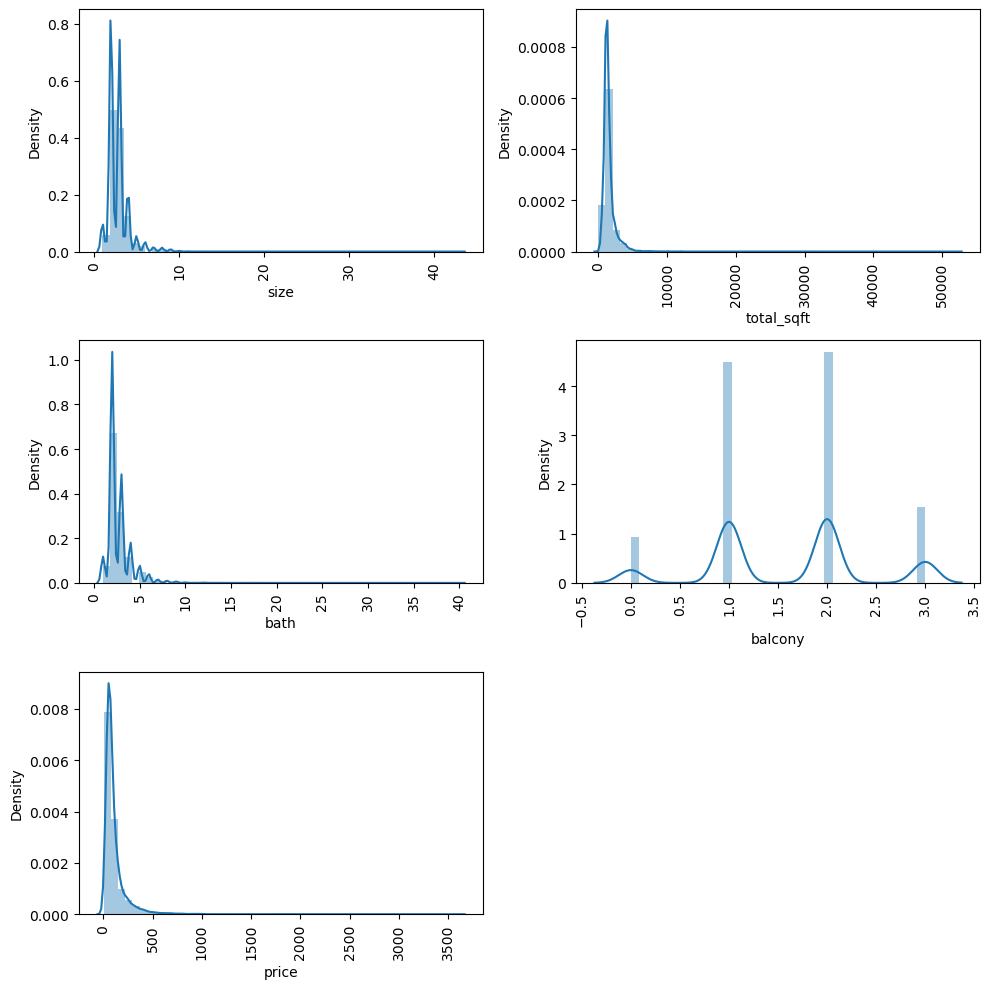

In [32]:
t = 1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

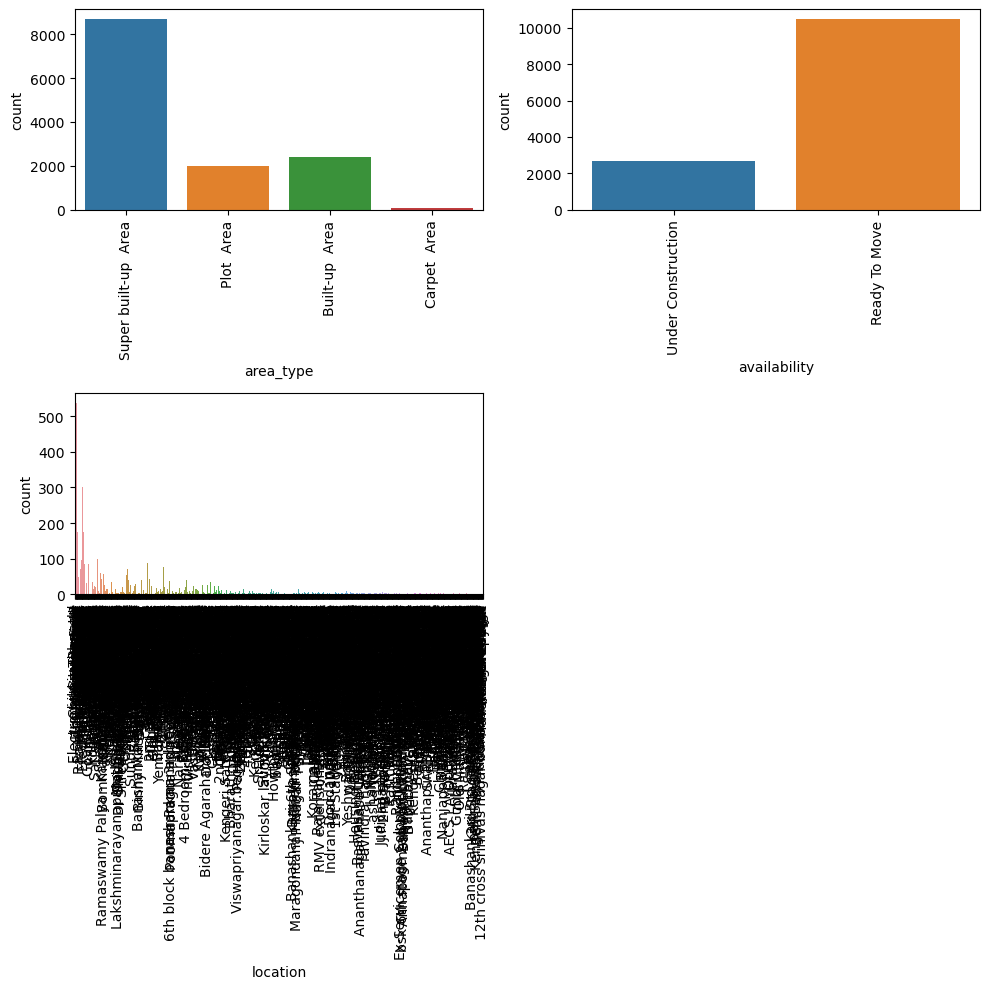

In [33]:
t = 1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(2,2,t)
    sns.countplot(x=data[i])
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

In [34]:
data['location'].value_counts()

Whitefield                                            538
Sarjapur  Road                                        398
Electronic City                                       302
Kanakpura Road                                        266
Thanisandra                                           232
Yelahanka                                             213
Uttarahalli                                           184
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     151
7th Phase JP Nagar                                    148
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                             99
Bellandur     

In [35]:
data['location'] = data['location'].str.lstrip(' ')

In [36]:
top_10_location = data.groupby(by='location')['price'].mean().sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Location as per Property Price')

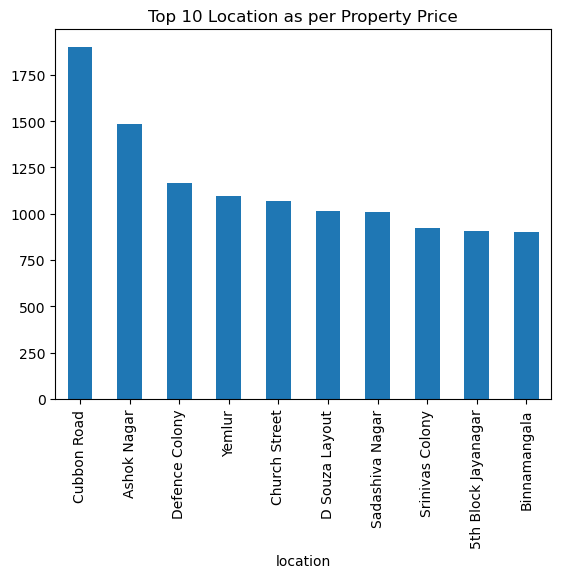

In [37]:
top_10_location.plot(kind='bar')
plt.title('Top 10 Location as per Property Price')

# Bivariate Analysis

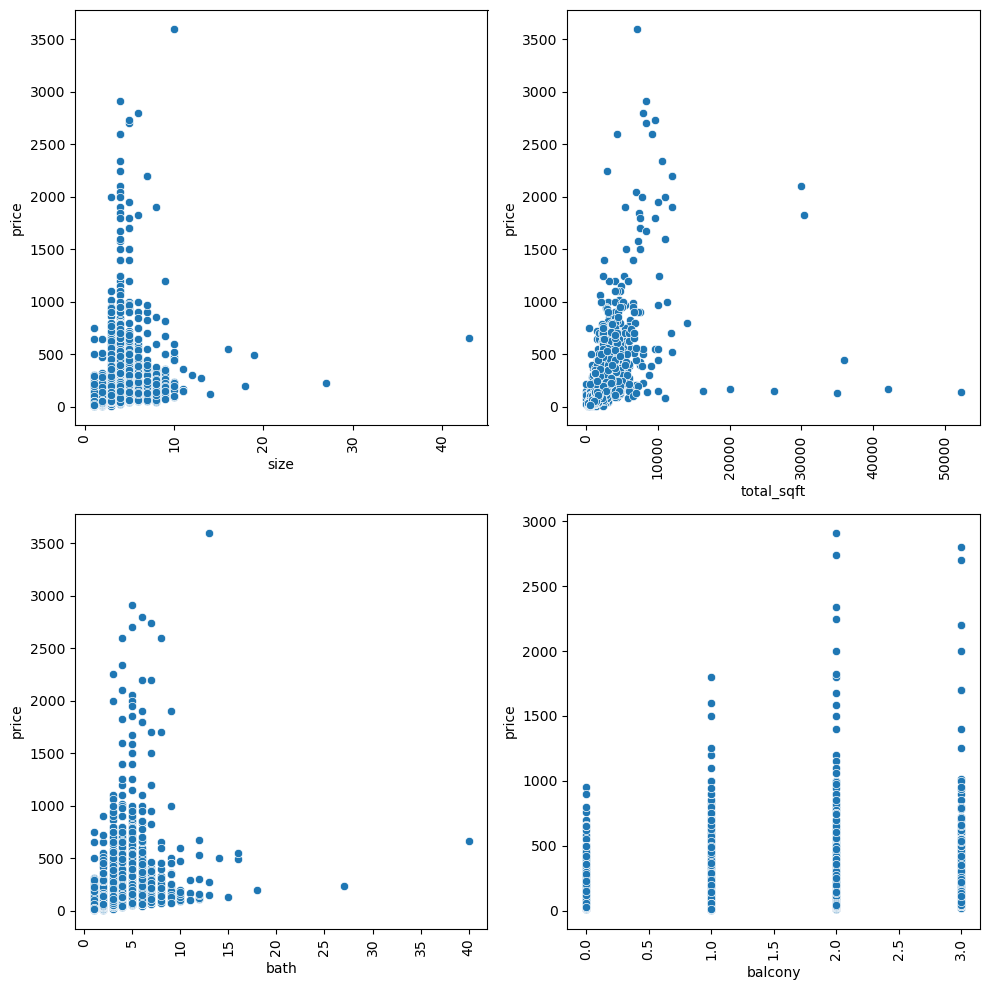

In [38]:
t = 1
plt.figure(figsize=(10,10))
for i in num_cols:
    if i != 'price':
        plt.subplot(2,2,t)
        sns.scatterplot(x=data[i],y=data['price'])
        plt.xticks(rotation=90)
        t+=1
plt.tight_layout()
plt.show()

<AxesSubplot:>

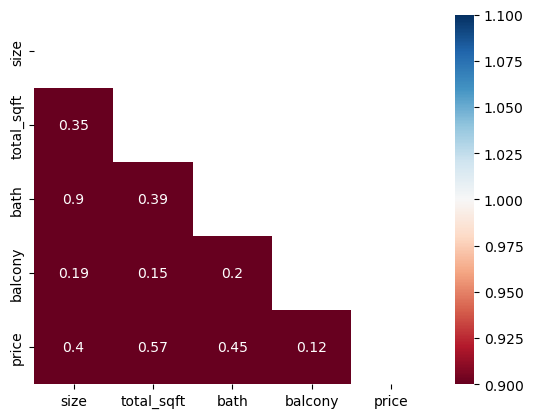

In [39]:
sns.heatmap(data.corr(),vmax=1,vmin=1,annot=True,cmap='RdBu',mask=np.triu(data.corr()))

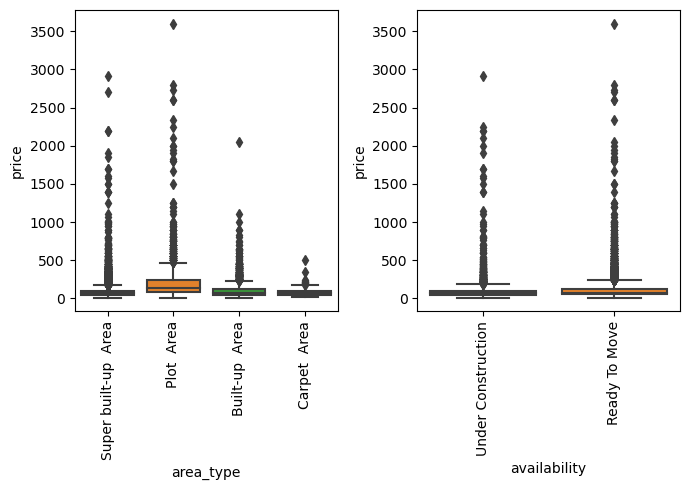

In [40]:
t = 1
plt.figure(figsize=(7,5))
for i in cat_cols:
    if i != 'location':
        plt.subplot(1,2,t)
        sns.boxplot(x=data[i],y=data['price'])
        plt.xticks(rotation=90)
        t+=1
plt.tight_layout()
plt.show()

## Data Preprocessing

In [41]:
# Treating missing values

In [42]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

balcony         4.566834
bath            0.538613
size            0.121378
location        0.007586
area_type       0.000000
availability    0.000000
total_sqft      0.000000
price           0.000000
dtype: float64

In [43]:
data[data['location'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3.0,1600.0,3.0,2.0,86.0


In [44]:
data.drop(index=[568],inplace=True)

In [45]:
data[data['size'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
579,Plot Area,Ready To Move,Sarjapur Road,NaN,1200.0,NaN,NaN,34.185
1775,Plot Area,Ready To Move,IVC Road,NaN,2000.0,NaN,NaN,124.000
2264,Plot Area,Ready To Move,Banashankari,NaN,2400.0,NaN,NaN,460.000
2809,Plot Area,Ready To Move,Sarjapur Road,NaN,1200.0,NaN,NaN,28.785
2862,Plot Area,Ready To Move,Devanahalli,NaN,1500.0,NaN,NaN,46.800
5333,Plot Area,Ready To Move,Devanahalli,NaN,2100.0,NaN,NaN,177.115
6423,Plot Area,Ready To Move,Whitefield,NaN,2324.0,NaN,NaN,26.730
6636,Plot Area,Ready To Move,Jigani,NaN,1500.0,NaN,NaN,25.490
6719,Plot Area,Ready To Move,Hoskote,NaN,800.0,NaN,NaN,28.545
7680,Plot Area,Ready To Move,Kasavanhalli,NaN,5000.0,NaN,NaN,400.000


In [46]:
# Lets impute this with mode
data['size'].isnull().sum()

16

In [47]:
data['size'].mode()

0    2.0
Name: size, dtype: float64

In [48]:
data['size'].fillna(data['size'].mode()[0],inplace = True)

In [49]:
data[data['bath'].isnull()]['size'].value_counts()

3.0    24
4.0    20
2.0    17
1.0     7
5.0     3
Name: size, dtype: int64

In [50]:
data.groupby(by='size')['bath'].median()

size
1.0      1.0
2.0      2.0
3.0      3.0
4.0      4.0
5.0      5.0
6.0      6.0
7.0      7.0
8.0      8.0
9.0      9.0
10.0    10.0
11.0    10.0
12.0     6.0
13.0    13.0
14.0    15.0
16.0    16.0
18.0    18.0
19.0    16.0
27.0    27.0
43.0    40.0
Name: bath, dtype: float64

In [51]:
data['bath']= np.where((data['bath'].isnull())&(data['size']==1),1,data['bath'])
data['bath']= np.where((data['bath'].isnull())&(data['size']==2),2,data['bath'])
data['bath']= np.where((data['bath'].isnull())&(data['size']==3),3,data['bath'])
data['bath']= np.where((data['bath'].isnull())&(data['size']==4),4,data['bath'])
data['bath']= np.where((data['bath'].isnull())&(data['size']==5),5,data['bath'])

In [52]:
data[data['balcony'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
6,Super built-up Area,Under Construction,Old Airport Road,4.0,2732.0,4.0,NaN,204.000
7,Super built-up Area,Ready To Move,Rajaji Nagar,4.0,3300.0,4.0,NaN,600.000
9,Plot Area,Ready To Move,Gandhi Bazar,6.0,1020.0,6.0,NaN,370.000
34,Built-up Area,Ready To Move,Kasturi Nagar,3.0,1925.0,3.0,NaN,125.000
40,Built-up Area,Ready To Move,Murugeshpalya,2.0,1296.0,2.0,NaN,81.000
45,Plot Area,Ready To Move,HSR Layout,8.0,600.0,9.0,NaN,200.000
56,Built-up Area,Under Construction,Devanahalli,4.0,3010.0,4.0,NaN,192.000
81,Built-up Area,Under Construction,Hennur Road,4.0,2957.0,4.0,NaN,224.500
140,Built-up Area,Ready To Move,Hennur Road,8.0,5000.0,8.0,NaN,250.000
146,Super built-up Area,Ready To Move,Kothanur,3.0,1828.0,3.0,NaN,110.000


In [53]:
data['balcony'].isnull().sum()

602

In [54]:
data.groupby(by='size')['balcony'].median()

size
1.0     1.0
2.0     1.0
3.0     2.0
4.0     2.0
5.0     2.0
6.0     2.0
7.0     2.0
8.0     2.0
9.0     2.0
10.0    3.0
11.0    3.0
12.0    2.0
13.0    0.0
14.0    0.0
16.0    NaN
18.0    NaN
19.0    NaN
27.0    0.0
43.0    0.0
Name: balcony, dtype: float64

In [55]:
data['balcony'].fillna(2,inplace=True)

In [56]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## Treat Outliers

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-p

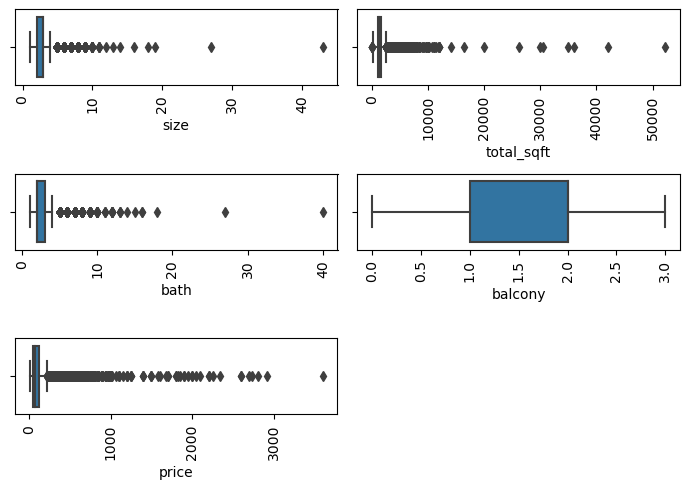

In [57]:
t = 1
plt.figure(figsize=(7,5))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],orient='h')
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

In [58]:
# Lets drop the extreme values (values greater than 95yh Percentile)

outlier_cols = ['size','total_sqft','bath','price']

p_99 = data[outlier_cols].quantile(0.99)

In [59]:
p_99

size             8.0
total_sqft    5000.0
bath             8.0
price          660.0
Name: 0.99, dtype: float64

In [60]:
data = data[~(data[outlier_cols]>p_99).any(axis=1)]

In [61]:
data.shape

(12902, 8)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-p

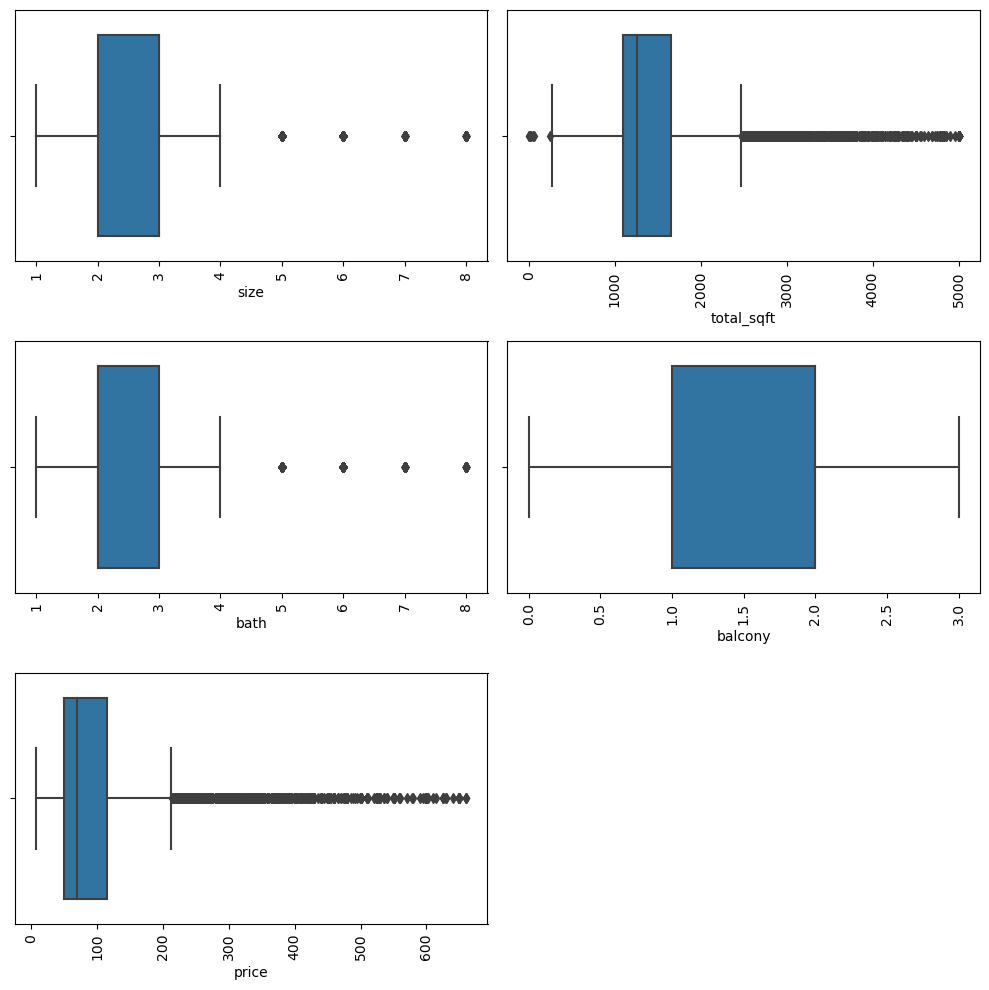

In [62]:
t = 1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],orient='h')
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

## Encoding

In [63]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [64]:
# pip install category_encoder

In [65]:
# catboost enconding is better than target encoding

In [66]:
data['availability'] = np.where(data['availability']=='Ready To Move',1,0)

In [67]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [68]:
(data['location'].value_counts(normalize=True)*100).cumsum()

Whitefield                                              4.084638
Sarjapur  Road                                          7.115176
Electronic City                                         9.455898
Kanakpura Road                                         11.517594
Thanisandra                                            13.331266
Yelahanka                                              14.958921
Uttarahalli                                            16.385057
Marathahalli                                           17.741435
Hebbal                                                 19.090064
Raja Rajeshwari Nagar                                  20.392187
Hennur Road                                            21.554798
Bannerghatta Road                                      22.701907
7th Phase JP Nagar                                     23.841265
Haralur Road                                           24.941869
Electronic City Phase II                               25.957216
Rajaji Nagar             

In [69]:
top_10_properties = data.groupby(by='location')['price'].mean().sort_values(ascending=False).head(10)

In [70]:
top_10_properties.index

Index(['6th block banashankari 3rd stage, 100 feet ORR',
       '1A Block Koramangala', 'Indiranagar HAL 2nd Stage', 'Richmond Road',
       'Koramangala Industrial Layout', 'Sadashiva Nagar',
       '2nd Block Koramangala', 'Rahat Bagh', 'Church Street',
       'Race Course Road'],
      dtype='object', name='location')

In [71]:
def location(s):
    if s in top_10_properties.index:
        return 1
    else:
        return 0

In [72]:
data['location'] = data['location'].apply(location)

In [73]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,0,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,1,0,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,1,0,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,0,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,0,2.0,1200.0,2.0,1.0,51.00


In [74]:
data = pd.get_dummies(data,drop_first=True)

In [75]:
data.head()

,availability,location,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0,0,2.0,1056.0,2.0,1.0,39.07,0,0,1
1,1,0,4.0,2600.0,5.0,3.0,120.00,0,1,0
2,1,0,3.0,1440.0,2.0,3.0,62.00,0,0,0
3,1,0,3.0,1521.0,3.0,1.0,95.00,0,0,1
4,1,0,2.0,1200.0,2.0,1.0,51.00,0,0,1


## Predictive Modelling

In [76]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [77]:
def model_validation(xtrain,ytrain,xtest,ytest,model):
    global m
    m = model
    m.fit(xtrain,ytrain)
    
    print('Training Scores')
    pred = m.predict(xtrain)
    print('R2:',r2_score(ytrain,pred))
    print('MSE:',mean_squared_error(ytrain,pred))
    print("RMSE:",mean_squared_error(ytrain,pred)**0.5)
    print('MAPE:',mean_absolute_percentage_error(ytrain,pred))
    
    print('\nTest Scores')
    pred = m.predict(xtest)
    print('R2:',r2_score(ytest,pred))
    print('MSE:',mean_squared_error(ytest,pred))
    print("RMSE:",mean_squared_error(ytest,pred)**0.5)
    print('MAPE:',mean_absolute_percentage_error(ytest,pred)) 

In [78]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [79]:
x = data.drop(columns=['price'])
y = data['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=1)

In [80]:
# Linear Regression

In [81]:
model_validation(x_train,y_train,x_test,y_test,LinearRegression())

Training Scores
R2: 0.6401256411326262
MSE: 2763.61140569108
RMSE: 52.570061876424305
MAPE: 0.3479956003212662

Test Scores
R2: 0.6570984039611146
MSE: 2521.6765869157152
RMSE: 50.21629802081905
MAPE: 0.35317182771081573


In [82]:
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,availability,4.893532
1,location,290.874716
2,size,-2.858363
3,total_sqft,0.081298
4,bath,11.332204
5,balcony,-0.902968
6,area_type_Carpet Area,9.687529
7,area_type_Plot Area,62.534323
8,area_type_Super built-up Area,0.725916


In [83]:
# Lasso
model_validation(x_train,y_train,x_test,y_test,Lasso(alpha=0.05))

Training Scores
R2: 0.639785975904628
MSE: 2766.219823532147
RMSE: 52.59486499205172
MAPE: 0.3485208522590465

Test Scores
R2: 0.6559914201684178
MSE: 2529.8172755108835
RMSE: 50.29728894792326
MAPE: 0.35389319867446034


In [84]:
# coefficent of Lasso
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,availability,4.477062
1,location,250.660965
2,size,-2.518612
3,total_sqft,0.081495
4,bath,11.009267
5,balcony,-0.820052
6,area_type_Carpet Area,0.091204
7,area_type_Plot Area,61.513319
8,area_type_Super built-up Area,0.000000


In [85]:
# Ridge

In [86]:
model_validation(x_train,y_train,x_test,y_test,Ridge(alpha=0.5))

Training Scores
R2: 0.640106344828748
MSE: 2763.759589311756
RMSE: 52.57147124925986
MAPE: 0.34806514056834753

Test Scores
R2: 0.6569110938033721
MSE: 2523.0540539346125
RMSE: 50.230011486506875
MAPE: 0.3532364022734129


In [87]:
# Coefficent of Ridge
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,availability,4.886538
1,location,279.960559
2,size,-2.866903
3,total_sqft,0.081366
4,bath,11.329379
5,balcony,-0.908562
6,area_type_Carpet Area,9.573376
7,area_type_Plot Area,62.500403
8,area_type_Super built-up Area,0.692447


In [88]:
# Elastic net
model_validation(x_train,y_train,x_test,y_test,ElasticNet(alpha=0.1,l1_ratio=0.01))

Training Scores
R2: 0.615070001040247
MSE: 2956.0231489286925
RMSE: 54.369321762632765
MAPE: 0.35626273304171086

Test Scores
R2: 0.6332568222747968
MSE: 2697.0060663579993
RMSE: 51.93270709637616
MAPE: 0.35587983500815046


In [89]:
# Coefficent of Elastic net
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,availability,3.121591
1,location,3.633106
2,size,2.217171
3,total_sqft,0.080653
4,bath,10.113764
5,balcony,-2.011686
6,area_type_Carpet Area,-0.071094
7,area_type_Plot Area,27.762897
8,area_type_Super built-up Area,-8.135447


## Feature Selection

In [90]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [91]:
sfs = SequentialFeatureSelector(estimator=LinearRegression(),k_features='best',scoring='r2')

In [92]:
sfs.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 9),
                          scoring='r2')

In [93]:
k=list(sfs.k_feature_names_)

In [94]:
sfs.k_score_

0.6388580329727575

In [95]:
model_validation(x_train[k],y_train,x_test[k],y_test,LinearRegression())

Training Scores
R2: 0.6398173947572983
MSE: 2765.978546271198
RMSE: 52.59257120802517
MAPE: 0.3494097976444748

Test Scores
R2: 0.6567541760928087
MSE: 2524.208016824757
RMSE: 50.241496960428606
MAPE: 0.35369877430865404


In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
model_validation(x_train,y_train,x_test,y_test,KNeighborsRegressor(n_neighbors=8))

Training Scores
R2: 0.717918441435898
MSE: 2166.2110494239596
RMSE: 46.542572440980955
MAPE: 0.2512322102587082

Test Scores
R2: 0.6407678683468133
MSE: 2641.7703099723644
RMSE: 51.398154733145475
MAPE: 0.2948387328318218


### Task: Improve the prediction of the model

#### Try Different Approach in Encoding

#### Try Different Techniques of Missing Value Treatment

#### Use Some Advance Models for the Prediction

In [98]:
# Lets take Linear Regression Model as the final Model.

In [99]:
model_validation(x_train,y_train,x_test,y_test,LinearRegression())

Training Scores
R2: 0.6401256411326262
MSE: 2763.61140569108
RMSE: 52.570061876424305
MAPE: 0.3479956003212662

Test Scores
R2: 0.6570984039611146
MSE: 2521.6765869157152
RMSE: 50.21629802081905
MAPE: 0.35317182771081573


In [100]:
m.feature_names_in_

array(['availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area'], dtype=object)

In [101]:
m.predict([[1,0,3,1500,2,2,1,0,0]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([95.17309399])

In [102]:
# Save the Trained Model

In [103]:
import pickle

In [104]:
with open('model_lr.pkl','wb') as File:
    pickle.dump(m,File)
print('The File has been saved')

The File has been saved
